In [1]:
from keras.layers import Input, Dense, Flatten, Reshape, Dropout, BatchNormalization, LeakyReLU
from keras.layers import Conv2DTranspose, Layer
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import Lambda
import numpy as np
from keras import objectives

import keras.backend as K
import keras

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from scipy.stats import norm

Using TensorFlow backend.


# 1. Autoencoders

Автоэнкодеры - это специфичный тип полносвязной нейронной сети, в котором входной слой соотвествует выходному. Сеть "сжимает" входной тензор в пространство более низкой размерности (latent-space representation) и из него пытается восcтановить выходное представление. 

<img src='./pic/autoencoders.png' width=60%>

Современные методы обощают идею encoder'а  и decoder'а от детерминированных функций к стохастическому распредлению $p_encoder (h | x)$ и $p_decoder(x | h)$
  
(LeCun, 1987; Bourlard and Kamp, 1988; Hinton and Zemel,1994)

<img src='./pic/nn_botleneck.png' width=60%>

Для того, чтобы понять процесс обучения, представим функию ошибки следующим образом: 
$$ L\bigl(x, g(f(x))\bigr), $$
  
Формально, $L$ функция которая штрафует $g(f(x))$ за несоответствие $x$. В качестве функции ошибки можно взять например MSE

Когда decoder и encoder линейны, а в качестве функции ошибки используется MSE, то подпространство соответствует пространству полученному с помощью Метода главных компонент (англ. principal component analysis, PCA) 

Автоэнкодеры с нелинейными encoder'ом м decoder'ом обучаются выделять более обобщающу ниленийную PCA

### Пример 1 - Keep it simple 
В качестве примера, возьмем MINST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

Напишите функцию для создания encoder'а, decoder'а и и autoencoder'а

In [4]:
def create_dense_ae(encoding_dim=42):
    # Построим encoder
    input_img = Input(shape=(28, 28, 1)) 
    # Используйте Flatten(), чтобы перевести тензор размерности (28, 28, 1) в вектор
    # Добавьте Dense слой, с функцией активации 'relu'
    # Размерность кодированного представления encoding_dim
    
    
    flat_img =  # <Ваш код здесь>
    encoded =  # <Ваш код здесь>
    
    #Соберите вход и выход с помощью Model()
    encoder =   # <Ваш код здесь>
    
    # Построим decoder 
    # Раскодированное другим полносвязным слоем изображение Какой размер использовать в Input()? 
    input_encoded =  # <Ваш код здесь>
    # Добавьте слой Dense с функцией активации 'sigmoid' (подумайте над колличеством нейронов)
    flat_decoded =  # <Ваш код здесь>
    #Верните размерность выходного тензора с помощью слоя Reshape
    
    decoded = # <Ваш код здесь> 
    # Соберите вход и выход с помощью Model()
    decoder = # <Ваш код здесь> 
    
    # Построим autoencoder, собрав вход и выход с помощью Model()
    autoencoder = # <Ваш код здесь> 
    return encoder, decoder, autoencoder

In [5]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 42)                32970     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         33712     
Total params: 66,682
Trainable params: 66,682
Non-trainable params: 0
_________________________________________________________________


Обучим сеть:

In [6]:
autoencoder.fit(x_train, x_train, epochs=1,
    batch_size=256,
    shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 27us/step - loss: 0.2656 - val_loss: 0.1805


Создадим функцию, для отрисовки картинок:

In [7]:
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False) 
            ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
n = 10
imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([1.5174855 , 0.        , 1.5031463 , 4.403536  , 0.        ,
       5.1419706 , 2.5044415 , 2.2642186 , 1.9583634 , 1.0895115 ,
       3.9228323 , 1.7404916 , 3.6997905 , 1.2187495 , 2.763238  ,
       3.7120593 , 1.226185  , 2.6786466 , 4.1563535 , 3.906732  ,
       2.9785628 , 4.718067  , 3.8944807 , 2.5208902 , 3.2812533 ,
       0.        , 2.7170396 , 3.977731  , 4.4854016 , 4.27734   ,
       2.5472984 , 1.3803371 , 6.1838975 , 2.9317243 , 1.7157714 ,
       0.38353762, 1.7034678 , 2.9953477 , 5.5929475 , 1.6873238 ,
       0.        , 4.425433  ], dtype=float32)

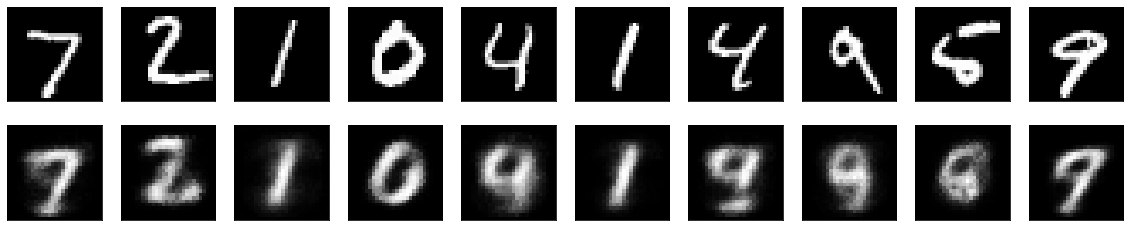

In [9]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)
plot_digits(imgs, decoded_imgs)

Результат вполне удовлетворительный, но давайте попробуем добавить больше слоев

### Пример 2  - We need to go deeper...
Мы работаем с картинками! Почему бы не использовать свертки?

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Deconv2D, UpSampling2D

_Если вдруг, кто не помнит, что такое UpSampling2D:_
<img src="./pic/upsampling.png" width=40%>

_А что такое Deconv2D?_

In [11]:
def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))
    # Начнем с Decoder'a: 
    # Добавьте 2D свертку c параметрами activation='relu', padding='same' 
    # (количество нейронов и размер ядра выберите на свой вкус)
    x =  # Ваш код здесь
    # Добавьте MaxPooling2D
    x =  # Ваш код здесь
    # Добавьте еще один слой сверток, но с меньшим колличеством нейронов
    x =  # Ваш код здесь
    # Добавьте еще один MaxPooling2D
    x =  # Ваш код здесь
    # Ну и на выходе еще один слой сверток
    encoded =  # Ваш код здесь
    
    # Теперь постройте Encoder: 
    # Какой будет размер входа? 
    input_encoded =  # Ваш код здесь, подумайте над размерностью: 
    # Добавьте симметричный Deconv2D
    x =  # Ваш код здесь
    # Добавьте симметричный UpSampling2D
    x =  # Ваш код здесь
    # Добавьте симметричный Deconv2D
    x =  # Ваш код здесь
    # Добавьте симметричный UpSampling2D
    x =  # Ваш код здесь
    # Добавьте симметричный Deconv2D
    decoded =  # Ваш код здесь
    # Соберите Модели:
    encoder = # Ваш код здесь
    decoder = # Ваш код здесь
    autoencoder_conv =  # Ваш код здесь
    return encoder, decoder, autoencoder_conv


In [12]:
c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
c_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           369       
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         549       
Total params: 918
Trainable params: 918
Non-trainable params: 0
_________________________________________________________________


In [13]:
c_autoencoder.fit(x_train, x_train, epochs=1, batch_size=256,
                                shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 14s 234us/step - loss: 0.3626 - val_loss: 0.2022


Посмотрим на результат:

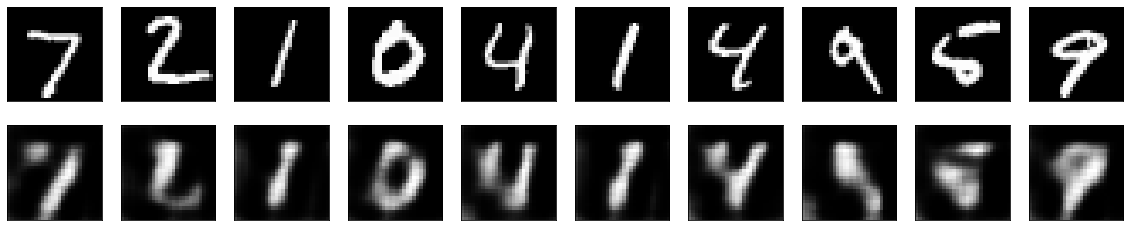

In [14]:
n = 10
imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)
plot_digits(imgs, decoded_imgs)

### Пример 3. Denoising

Одной из акутальных задач, является убрать шум в данных:
  
   
<img src ='./pic/denoising.png' width=60%>

In [15]:
batch_size = 16
def create_denoising_model(autoencoder): 
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x, 0., 1.)
        return x
    
    input_img = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)
    noiser = Model(input_img, noised_img, name="noiser")
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name="denoiser")
    return noiser, denoiser_model

noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
denoiser_model.fit(x_train, x_train, epochs=5,
batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.1611 - val_loss: 0.1426
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.1398 - val_loss: 0.1354
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.1353 - val_loss: 0.1321
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.1336 - val_loss: 0.1316
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.1331 - val_loss: 0.1303


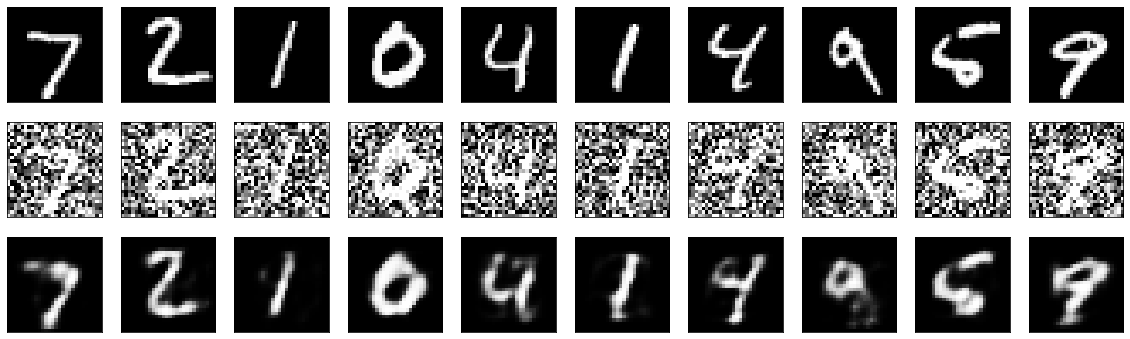

In [17]:
n = 10
imgs = x_test[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n], batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)
plot_digits(imgs[:n], noised_imgs, decoded_imgs)

### Для чего мы это делали? 
Как это можно применить на практике? 
1. Снижение размерности
2. Убрать шумы в данных 
3. Variational Autoencoders

# 2. Variational Autoencoders (VAE)

Variational Autoencoders (VAE) — это автоэнкодеры, которые учатся отображать объекты в заданное скрытое пространство и, соответственно, сэмплить из него. Поэтому вариационные автоэнкодеры относят также к семейству генеративных моделей.  
<img src='./pic/vae.png' width=40%>
Генеративные модели используют для того, чтобы производить случайные выходные данные, которые выглядят схоже с тренировочным набором данных. 

Однако, зачастую необходимо изменить или исследовать вариации на данных, которые уже имеются, и не случайным образом, а определённым желаемым способом. В этом случае VAEs работают лучше, чем любой другой ныне доступный метод.

<img src='./pic/vae_example.png' width=30%>

Классический вид VAE:

<img src ='./pic/simple_vae.png' width=60%>

Вариационные Автоэнкодеры способны работать с удивительно разнообразными типами данных: последовательными или непоследовательными, непрерывными или дискретными и т.д. Эта характерная черта делает их наиболее эффективными инструментами генерации и обуславливает их высокую популярность в сфере машинного обучения.

Для того, чтобы Latent-space было представлено нормальным распредленеим, то энкодер для каждого X предсказывает 2 значения: среднее $\mu$ и вариацию $\Sigma$ нормального распределения, из которого уже сэмплируются значения. Работает это все примерно вот так:
<img src='./pic/a_lots_of_distr.png' width=50%>

Наша Выборка выборка, должна соответствовать:
  
$$ P(X) = \int_{z} P(X|Z)P(Z)dZ $$

- $P(X)$ – вероятностное распределение изображений цифр на картинках, т.е. вероятность конкретного изображения цифры в принципе быть нарисованным (если картинка не похожа на цифру, то эта вероятность крайне мала, и наоборот),  
- $P(Z)$ — вероятностное распределение скрытых факторов, например, распределение толщины штриха,  
- $P(X|Z)$ — распределение вероятности картинок при заданных скрытых факторах, одни и те же факторы могут привести к разным картинкам (один и тот же человек в одних и тех же условиях не рисует абсолютно одинаковые цифры).

Для того чтобы знать, из каких $Z$ нам надо сэмплить, введем новое распределение $Q(Z|X)$, которое в зависимости от $X$ будет показывать распределение $Z \sim Q$, которое могло привести к этому X


$$\log P(X) - KL[Q(Z|X)||P(Z|X)] = \mathbb{E}_{Z \sim Q}[\log P(X|Z)] - KL[Q(Z|X)||P(Z)]$$



$$KL[Q(Z|X;\theta_1)||N(0,I)] = \frac{1}{2}\left(tr(\Sigma(X)) + \mu(X)^T\mu(X) - k - \log \det \Sigma(X) \right)$$

Так как мы берем случайные значения $Z \sim Q(Z|X;\theta_1)$ и передаем их в декодер, то ясно, что распространять ошибки через случайные значения напрямую нельзя, поэтому используется так называемый трюк с репараметризацией (reparametrization trick).Процесс обучения:

<img src='./pic/train_vae.png' width=60%>

То есть по сути просто берем предсказанное энкодером стандартное отклонение $\Sigma$ умножаем на случайное число из $N(0,I)$ и добавляем предсказанное среднее $\mu$.
Прямое распространение на обеих схемах абсолютно одинаковое, однако на правой схеме работает обратное распространение ошибки.

<img src='./pic/decoder_vae.png' width=40%>

После того как мы обучили такой вариационный автоэнкодер, декодер становится полноправной генеративной моделью. По сути и энкодер-то нужен в основном для того, чтобы обучить декодер отдельно быть генеративной моделью.

### Пример: Генерация цифр

##### 1. Encoder network

In [18]:
# network parameters
n_hidden, z_dim = 256, 2
batch_size, n_epoch = 100, 20

In [19]:
# encoder
x = Input(shape=(x_train.shape[1:]))
# Используйте Flatten(), чтобы перевести тензор размерности (28, 28, 1) в вектор
flat_img = # Ваш код здесь
# Добавьте 2 полносвязных слоя, используйте колличество нейронов n_hidden на первом слое и n_hidden//2 на втором
# Функция активации 'relu'
x_encoded = # Ваш код здесь
x_encoded = # Ваш код здесь

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)

##### 2. sampling function

In [20]:
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps

z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

##### 3. Decoder network

In [21]:
# decoder
# Добавьте 2 полносвязных слоя, используйте колличество нейронов n_hidden//2 на первом слое и n_hidden на втором
# Функция активации 'relu'

z_decoder1 = # Ваш код здесь
z_decoder2 = # Ваш код здесь

y_decoder = Dense(x_train.shape[1]**2, activation='sigmoid')
 
z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)

##### 4. Loss

In [22]:
reconstruction_loss = keras.objectives.binary_crossentropy(flat_img, y) * x_train.shape[1] * x_train.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

##### 5. Build model

In [23]:
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_6[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 256)          200960      flatten_2[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128)          32896       dense_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

##### 6. Обучаем сеть

In [24]:
vae.fit(x_train, shuffle=True,
       epochs=n_epoch,
       batch_size=batch_size,
       validation_data=(x_test, None), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 189.5871 - val_loss: 167.6672
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 162.8177 - val_loss: 159.0828
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 156.9482 - val_loss: 155.3283
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 153.9183 - val_loss: 153.0963
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 151.7592 - val_loss: 150.6569
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 150.1445 - val_loss: 149.1326
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 148.4143 - val_loss: 148.5866
Epoch 8/20
60000/60000 [==============================] - 3s 48us/step - loss: 147.0659 - val_loss: 147.9458
Epoch 9/20
60000/60000 [==============================] - 3s 48us/step - loss:

In [25]:
# build encoder
encoder = Model(x, mu)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 234,114
Trainable params: 234,114
Non-trainable params: 0
_________________________________________________________________


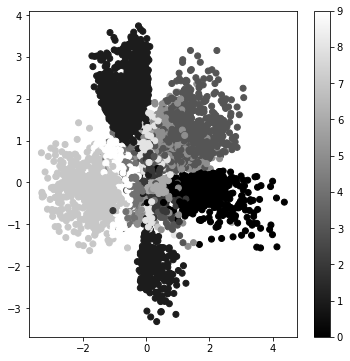

In [26]:
# Plot of the digit classes in the latent space
x_te_latent = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [27]:
# build decoder
decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               201488    
Total params: 234,896
Trainable params: 234,896
Non-trainable params: 0
_________________________________________________________________


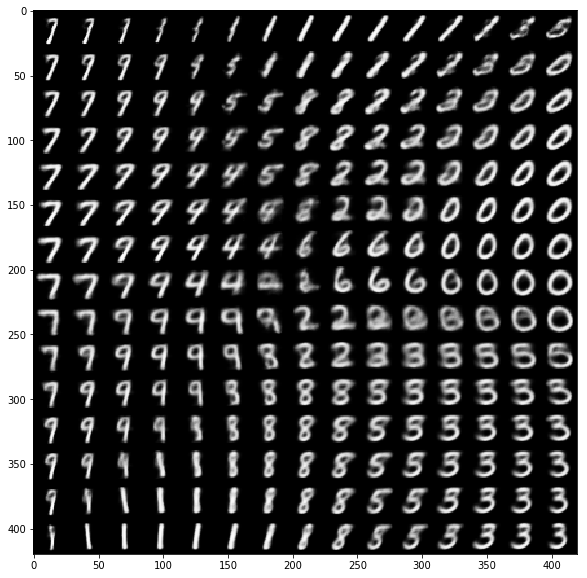

In [28]:
# display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) 
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

# 3. GAN (Generative Adversarial Networks)

Генеративно-состязательная нейросеть (Generative adversarial network, GAN) — архитектура, состоящая из генератора и дискриминатора, настроенных на работу друг против друга. Отсюда GAN и получила название генеративно-соcтязательная.


<img src='./pic/gans.png'>

In [29]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dropout, BatchNormalization, Reshape, Flatten, RepeatVector
from keras.layers import Lambda, Dense, Input, Conv2D, MaxPool2D, UpSampling2D, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, load_model


from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

y_train_cat = to_categorical(y_train).astype(np.float32)
y_test_cat  = to_categorical(y_test).astype(np.float32)

In [30]:
from keras import backend as K
import tensorflow as tf
sess = tf.Session()
K.set_session(sess)

In [31]:
batch_size = 256
batch_shape = (batch_size, 28, 28, 1)
latent_dim = 2
num_classes = 10
dropout_rate = 0.3

Обучать модель мы теперь будем не с помощью метода .fit, а напрямую из tensorflow, поэтому напишем итератор, возвращающий очередной батч:

In [32]:
def gen_batch(x, y):
    n_batches = x.shape[0] // batch_size
    while(True):
        for i in range(n_batches):
            yield x[batch_size*i: batch_size*(i+1)], y[batch_size*i: batch_size*(i+1)]
        idxs = np.random.permutation(y.shape[0])
        x = x[idxs]
        y = y[idxs]


train_batches_it = gen_batch(x_train, y_train_cat)
test_batches_it  = gen_batch(x_test,  y_test_cat)

In [33]:
x_ = tf.placeholder(tf.float32, shape=(None, 28, 28, 1),   name='image')
y_ = tf.placeholder(tf.float32, shape=(None, num_classes), name='labels')
z_ = tf.placeholder(tf.float32, shape=(None, latent_dim),  name='z')

img = Input(tensor=x_)
lbl = Input(tensor=y_)
z   = Input(tensor=z_)

Напишем модель генератора. Keras работает со scope’ами, а нам нужно разделить генератор и дискриминатор, чтобы потом обучать их по-отдельности

In [34]:
with tf.variable_scope('generator'):
    x = concatenate([z, lbl])
    x = Dense(7*7*64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Reshape((7, 7, 64))(x)
    x = UpSampling2D(size=(2, 2))(x)

    x = Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same')(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Dropout(dropout_rate)(x)
    x = UpSampling2D(size=(2, 2))(x)

    generated = Conv2D(1, kernel_size=(5, 5), activation='sigmoid', padding='same')(x)
generator = Model([z, lbl], generated, name='generator')

Далее модель дискриминатора. Здесь нам нужно добавить ко входящему изображению еще лейбл цифры. Для этого после применения первого сверточного слоя добавим к фильтрам лейблы. Сперва функция, которая это делает, потом модель дискриминатора.

In [35]:
def add_units_to_conv2d(conv2, units):
    dim1 = int(conv2.shape[1])
    dim2 = int(conv2.shape[2])
    dimc = int(units.shape[1])
    repeat_n = dim1*dim2
    units_repeat = RepeatVector(repeat_n)(lbl)
    units_repeat = Reshape((dim1, dim2, dimc))(units_repeat)
    return concatenate([conv2, units_repeat])


with tf.variable_scope('discrim'):
    x = Conv2D(128, kernel_size=(7, 7), strides=(2, 2), padding='same')(img)
    x = add_units_to_conv2d(x, lbl)
    x = LeakyReLU()(x)
    x = Dropout(dropout_rate)(x)
    x = MaxPool2D((2, 2), padding='same')(x)
    
    l = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = LeakyReLU()(l)
    x = Dropout(dropout_rate)(x)

    h = Flatten()(x)
    d = Dense(1, activation='sigmoid')(h)
discrim = Model([img, lbl], d, name='Discriminator')

In [36]:
generated_z = generator([z, lbl])

discr_img   = discrim([img, lbl])
discr_gen_z = discrim([generated_z, lbl])

gan_model = Model([z, lbl], discr_gen_z, name='GAN')
gan   = gan_model([z, lbl])

Теперь лосс ошибки определения реального изображения, и лосс сгенерированного, а также на их основе лоссы генератора и дискриминатора.

In [37]:
log_dis_img   = tf.reduce_mean(-tf.log(discr_img + 1e-10))
log_dis_gen_z = tf.reduce_mean(-tf.log(1. - discr_gen_z + 1e-10))

L_gen = -log_dis_gen_z
L_dis = 0.5*(log_dis_gen_z + log_dis_img)

In [38]:
optimizer_gen = tf.train.RMSPropOptimizer(0.0003)
optimizer_dis = tf.train.RMSPropOptimizer(0.0001)

# Переменные генератора и дискриминаторы (отдельно) для оптимизаторов
generator_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "generator")
discrim_vars   = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "discrim")

step_gen = optimizer_gen.minimize(L_gen, var_list=generator_vars)
step_dis = optimizer_dis.minimize(L_dis, var_list=discrim_vars)
# Инициализируем переменные:
sess.run(tf.global_variables_initializer())

Отдельно напишем функции, которые будем вызывать для обучения генератора и дискриминатора:

In [39]:
# Шаг обучения генератора
def step(image, label, zp):
    l_dis, _ = sess.run([L_dis, step_gen], feed_dict={z:zp, lbl:label, img:image, K.learning_phase():1})
    return l_dis

# Шаг обучения дискриминатора
def step_d(image, label, zp):
    l_dis, _ = sess.run([L_dis, step_dis], feed_dict={z:zp, lbl:label, img:image, K.learning_phase():1})
    return l_dis

In [40]:
# Массивы, в которые будем сохранять результаты, для последующей визуализации
figs = [[] for x in range(num_classes)]
periods = []

save_periods = list(range(100)) + list(range(100, 1000, 10))

n = 15 # Картинка с 15x15 цифр
from scipy.stats import norm
# Так как сэмплируем из N(0, I), то сетку узлов, в которых генерируем цифры, берем из обратной функции распределения
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
def draw_manifold(label, show=True):
    # Рисование цифр из многообразия
    figure = np.zeros((28 * n, 28 * n))
    input_lbl = np.zeros((1, 10))
    input_lbl[0, label] = 1.
    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.zeros((1, latent_dim))
            z_sample[:, :2] = np.array([[xi, yi]])

            x_generated = sess.run(generated_z, feed_dict={z:z_sample, lbl:input_lbl, K.learning_phase():0})
            digit = x_generated[0].squeeze()
            figure[i * 28: (i + 1) * 28,
                   j * 28: (j + 1) * 28] = digit
    if show:
        # Визуализация
        plt.figure(figsize=(10, 10))
        plt.imshow(figure, cmap='Greys')
        plt.grid(False)
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.show()
    return figure


n_compare = 10
def on_n_period(period):
    clear_output() # Не захламляем output

    # Рисование многообразия для рандомного y
    draw_lbl = np.random.randint(0, num_classes)    
    print(draw_lbl)
    for label in range(num_classes):
        figs[label].append(draw_manifold(label, show=label==draw_lbl))

    periods.append(period)

0


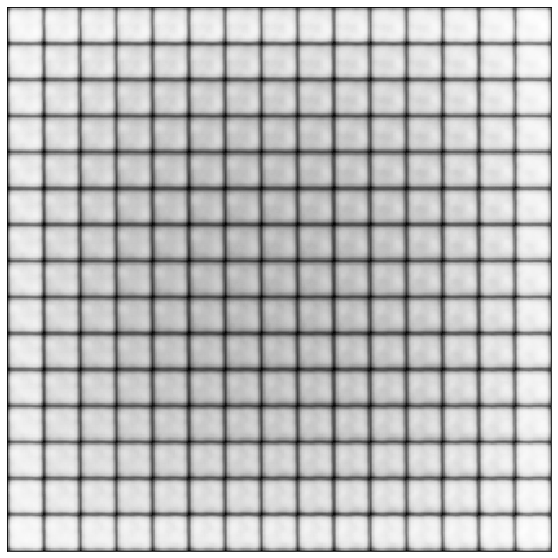

0.423365
.............

In [ ]:
batches_per_period = 20 # Как часто сохранять картинки
k_step = 5 # Количество шагов, которые могут делать дискриминатор и генератор во внутреннем цикле

for i in range(5000):
    print('.', end='')
    # Достанем новый батч
    b0, b1 = next(train_batches_it)
    zp = np.random.randn(batch_size, latent_dim)
    # Шаги обучения дискриминатора
    for j in range(k_step):
        l_d = step_d(b0, b1, zp)
        b0, b1 = next(train_batches_it)
        zp = np.random.randn(batch_size, latent_dim)
        if l_d < 1.0:
            break

    # Шаги обучения генератора
    for j in range(k_step):
        l_d = step(b0, b1, zp)
        if l_d > 0.4:
            break
        b0, b1 = next(train_batches_it)
        zp = np.random.randn(batch_size, latent_dim)

    # Периодическое рисование результата
    if not i % batches_per_period:
        period = i // batches_per_period
        if period in save_periods:
            on_n_period(period)
        print(l_d)

# 4. Литература и ссылки: 
1. [Глава 14 Autoencoders](http://www.deeplearningbook.org/contents/autoencoders.html) DeepLeerningBook.org /  Goodfellow, Bengio, Courville
2. [Глава 20 Deep Generative Models](http://www.deeplearningbook.org/contents/generative_models.html) DeepLeerningBook.org /  Goodfellow, Bengio, Courville
3. Статья: [Applied Deep Learning - part 3](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798#ad4f)
4. Серия статей от [М. Сурцукова](https://habr.com/ru/users/iphysic/) на хабр: 
[Часть 1](https://habr.com/ru/post/331382/)
[Часть 2](https://habr.com/ru/post/331500/)
[Часть 3](https://habr.com/ru/post/331552/)
[Часть 4](https://habr.com/ru/post/331664/)
[Часть 5](https://habr.com/ru/post/332000/)
[Часть 6](https://habr.com/ru/post/332074/)